# Chapter 3: Probability mass functions
---

## 3.1 - PMFs

In [1]:
import thinkstats2

In [2]:
pmf = thinkstats2.Pmf([1, 2, 2, 3, 5])
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

In [3]:
pmf.Prob(2)

0.4

In [4]:
pmf[2]

0.4

In [5]:
pmf.Incr(2, 0.2)
pmf.Prob(2)

0.6000000000000001

In [6]:
pmf.Mult(2, 0.5)
pmf[2]

0.30000000000000004

In [7]:
pmf.Total()

0.8999999999999999

In [8]:
pmf.Normalize()
pmf.Total()

1.0

## 3.2 - Plotting PMFs

In [9]:
import nsfg
import thinkplot

In [10]:
preg = nsfg.ReadFemPreg()

In [11]:
live = preg[preg.outcome == 1]

In [12]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

In [13]:
firsts_pmf = thinkstats2.Pmf(firsts.prglngth)
others_pmf = thinkstats2.Pmf(others.prglngth)

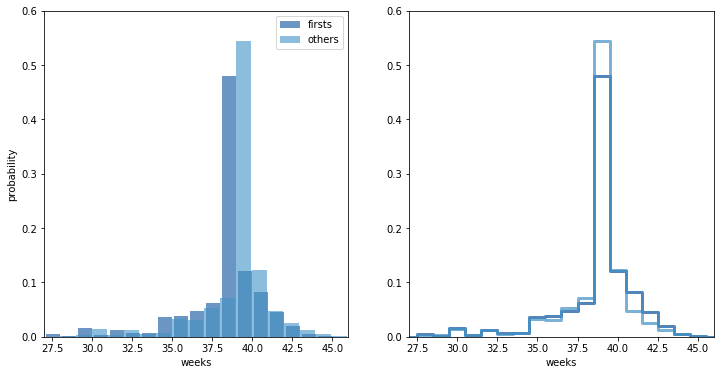

<Figure size 576x432 with 0 Axes>

In [14]:
thinkplot.PrePlot(2, cols=2)

thinkplot.Hist(firsts_pmf, align='right', label='firsts')
thinkplot.Hist(others_pmf, align='left', label='others')
thinkplot.Config(xlabel='weeks', ylabel='probability', axis=[27, 46, 0, 0.6])

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([firsts_pmf, others_pmf])

thinkplot.Show(xlabel='weeks', axis=[27, 46, 0, 0.6])

## 3.3 - Other visualizations

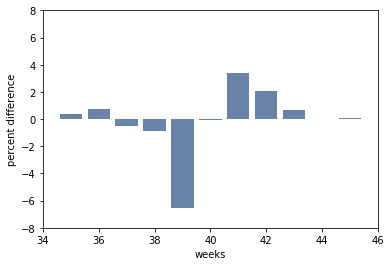

<Figure size 576x432 with 0 Axes>

In [15]:
weeks = range(35, 46)
diffs = []

for week in weeks:
    p1 = firsts_pmf.Prob(week)
    p2 = others_pmf.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)

thinkplot.Bar(weeks, diffs)
thinkplot.Show(xlabel='weeks', ylabel='percent difference', axis=[34, 46, -8, 8])

## 3.4 - The class size paradox

In [16]:
d = { 7: 8, 12: 8, 17: 14, 22: 4, 27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }
pmf = thinkstats2.Pmf(d, label='actual')

print('mean', pmf.Mean())

mean 23.692307692307693


In [17]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    
    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
    
    new_pmf.Normalize()
    return new_pmf

biased_pmf = BiasPmf(pmf, label='observed')

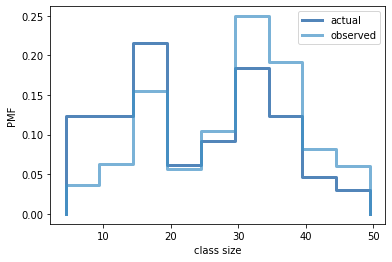

<Figure size 576x432 with 0 Axes>

In [18]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Show(xlabel='class size', ylabel='PMF')

In [19]:
def UnbiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    
    for x, p in pmf.Items():
        new_pmf.Mult(x, 1.0/x)

    new_pmf.Normalize()
    return new_pmf

## 3.5 - DataFrame indexing

In [20]:
import numpy as np
import pandas as pd

In [21]:
array = np.random.randn(4, 2)

df = pd.DataFrame(array)
df

,0,1
0,0.448597,-0.168751
1,0.961024,-1.566484
2,0.131382,-1.194208
3,-0.262092,0.848738


In [22]:
columns = ['A', 'B']

df = pd.DataFrame(array, columns=columns)
df

,A,B
0,0.448597,-0.168751
1,0.961024,-1.566484
2,0.131382,-1.194208
3,-0.262092,0.848738


In [23]:
index = ['a', 'b', 'c', 'd']

df = pd.DataFrame(array, columns=columns, index=index)
df

,A,B
a,0.448597,-0.168751
b,0.961024,-1.566484
c,0.131382,-1.194208
d,-0.262092,0.848738


In [24]:
df['A']

a    0.448597
b    0.961024
c    0.131382
d   -0.262092
Name: A, dtype: float64

In [25]:
df.loc['a']

A    0.448597
B   -0.168751
Name: a, dtype: float64

In [26]:
df.iloc[0]

A    0.448597
B   -0.168751
Name: a, dtype: float64

In [27]:
indices = ['a', 'c']
df.loc[indices]

,A,B
a,0.448597,-0.168751
c,0.131382,-1.194208


In [28]:
df['a':'c']

,A,B
a,0.448597,-0.168751
b,0.961024,-1.566484
c,0.131382,-1.194208


In [29]:
df[0:2]

,A,B
a,0.448597,-0.168751
b,0.961024,-1.566484


---
## 3.6 - Exercises
---

### Exercise 3.1

In [30]:
resp = nsfg.ReadFemResp()

In [38]:
pmf = thinkstats2.Pmf(resp.numkdhh, label='unbiased')
pmf

Pmf({0: 0.466178202276593, 1: 0.21405207379301322, 2: 0.19625801386889966, 3: 0.08713855815779145, 4: 0.025644380478869556, 5: 0.01072877142483318}, 'unbiased')

In [39]:
biased_pmf = BiasPmf(pmf, label='biased')

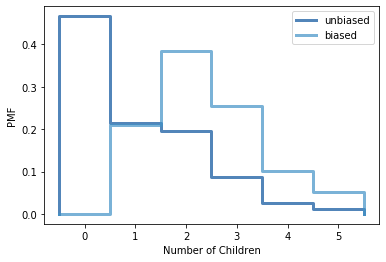

<Figure size 576x432 with 0 Axes>

In [42]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Show(xlabel='Number of Children', ylabel='PMF')

### Exercise 3.2

In [52]:
def PmfMean(pmf):
    mean = 0
    
    for value, prob in pmf.Items():
        mean = mean + (value * prob)
    
    return mean

print("Mean from PmfMean(): ", PmfMean(pmf))
print("Mean from pmf.Mean(): ", pmf.Mean())

Mean from PmfMean():  1.024205155043831
Mean from pmf.Mean():  1.024205155043831


In [53]:
def PmfVar(pmf, mean):
    var = 0
    
    for value, prob in pmf.Items():
        var = var + prob * (value - mean)**2
    
    return var

print("Variance from PmfVar(): ", PmfVar(pmf, PmfMean(pmf)))
print("Variance from pmf.Var(): ", pmf.Var())

Variance from PmfVar():  1.4128643263531195
Variance from pmf.Var():  1.4128643263531195


### Exercise 3.3

In [82]:
caseids = resp[resp['parity'] >= 2].caseid

mult_child = live[(live['caseid'].isin(caseids))]
mult_child

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13578,12566,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,2080.317155,2422.820274,2627.548587,2,2,NaN,6.0000
13579,12566,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,2080.317155,2422.820274,2627.548587,2,2,NaN,7.0000
13588,12571,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,NaN,6.1875
13591,12571,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,NaN,7.5000


In [98]:
first_mult = thinkstats2.Pmf(mult_child[mult_child['pregordr'] == 1].prglngth, label='firsts')
other_mult = thinkstats2.Pmf(mult_child[mult_child['pregordr'] != 1].prglngth, label='others')

In [99]:
other_mult

Pmf({39: 0.5337308982482296, 40: 0.12281028699217293, 38: 0.06876630637346254, 37: 0.05255311218784942, 41: 0.05124860231084607, 35: 0.03168095415579575, 36: 0.03168095415579575, 42: 0.030935519940365263, 43: 0.014908684308609765, 30: 0.013976891539321655, 32: 0.012299664554603056, 34: 0.007081625046589638, 44: 0.004845322400298174, 33: 0.004845322400298174, 26: 0.004286246738725307, 31: 0.002981736861721953, 29: 0.002422661200149087, 28: 0.0022363026462914647, 45: 0.0011181513231457323, 24: 0.0011181513231457323, 48: 0.0009317927692881103, 22: 0.0007454342154304882, 50: 0.0003727171077152441, 27: 0.0003727171077152441, 25: 0.0003727171077152441, 17: 0.00018635855385762206, 13: 0.00018635855385762206, 9: 0.00018635855385762206, 18: 0.00018635855385762206, 19: 0.00018635855385762206, 21: 0.00018635855385762206, 20: 0.00018635855385762206, 4: 0.00018635855385762206, 0: 0.00018635855385762206}, 'others')

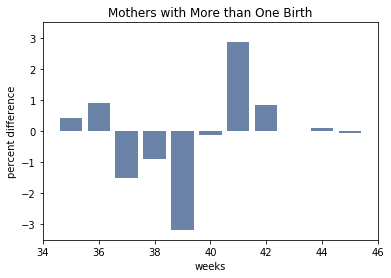

<Figure size 576x432 with 0 Axes>

In [104]:
weeks = range(35, 46)
diffs = []

for week in weeks:
    p1 = first_mult.Prob(week)
    p2 = other_mult.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)

thinkplot.Bar(weeks, diffs)
thinkplot.Show(xlabel='weeks', ylabel='percent difference', axis=[34, 46, -3.5, 3.5], title='Mothers with More than One Birth')

### Exercise 3.4

In [105]:
import relay

In [119]:
results = relay.ReadResults()

speeds = relay.GetSpeeds(results) # MPH
speeds = [round(speed, 1) for speed in speeds]
speeds

[12.1,
 11.8,
 11.7,
 11.5,
 11.3,
 11.2,
 11.1,
 11.0,
 11.0,
 11.0,
 10.9,
 10.8,
 10.5,
 10.4,
 10.2,
 10.1,
 10.1,
 10.0,
 9.9,
 9.9,
 9.9,
 9.8,
 9.8,
 9.8,
 9.8,
 9.7,
 9.7,
 9.7,
 9.7,
 9.7,
 9.7,
 9.6,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.4,
 9.4,
 9.4,
 9.4,
 9.4,
 9.4,
 9.4,
 9.4,
 9.4,
 9.4,
 9.3,
 9.3,
 9.3,
 9.2,
 9.2,
 9.2,
 9.2,
 9.2,
 9.1,
 9.1,
 9.1,
 9.1,
 9.1,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 8.9,
 8.9,
 8.9,
 8.9,
 8.9,
 8.9,
 8.9,
 8.9,
 8.9,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.2,
 8.2,
 8.2

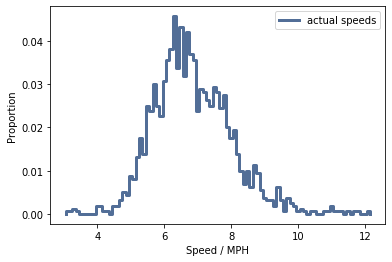

<Figure size 576x432 with 0 Axes>

In [134]:
speeds_dict = {}
for speed in speeds:
    if speed in speeds_dict:
        speeds_dict[speed] = speeds_dict[speed] + 1
    else:
        speeds_dict[speed] = 1

speeds_true = thinkstats2.Pmf(speeds_dict, label='actual speeds')

In [145]:
def ObservedPmf(pmf, speed):
    pmf_ = pmf.Copy(label='observed speeds')
    
    for val in pmf.Values():
        diff = abs(val - speed)
        pmf_.Mult(val, diff)
    
    pmf_.Normalize()
    
    return pmf_

speeds_obs = ObservedPmf(speeds_true, 7.5)

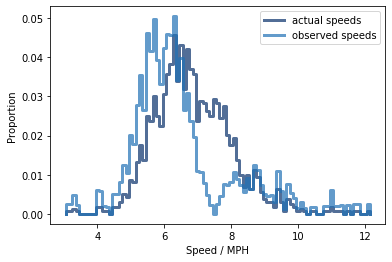

<Figure size 576x432 with 0 Axes>

In [146]:
thinkplot.Pmfs([speeds_true, speeds_obs])
thinkplot.Show(xlabel='Speed / MPH', ylabel='Proportion')